In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Mental Health Dataset.csv')
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [3]:
df.shape

(10392, 3)

In [4]:
df.columns

Index(['posts', 'predicted', 'intensity'], dtype='object')

In [5]:
df.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [6]:
df[df.posts.isnull()]

,posts,predicted,intensity
3979,NaN,neutral,0


In [7]:
df = df.dropna()
df.isnull().sum()

posts        0
predicted    0
intensity    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10391 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10391 non-null  object
 2   intensity  10391 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 324.7+ KB


In [9]:
df.nunique()

posts        10391
predicted        4
intensity        4
dtype: int64

In [10]:
df['predicted'].unique()

array(['negative', 'neutral', 'positive', 'very negative'], dtype=object)

In [11]:
df['predicted'].value_counts()

predicted
neutral          4374
negative         4112
very negative    1155
positive          750
Name: count, dtype: int64

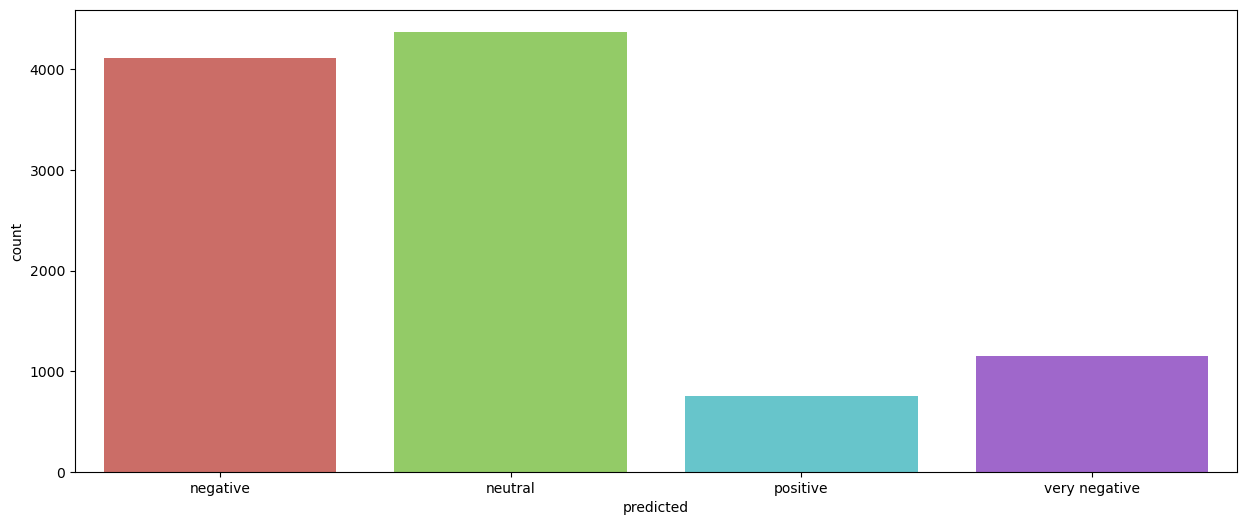

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['predicted'], data=df,palette='hls')
plt.show()

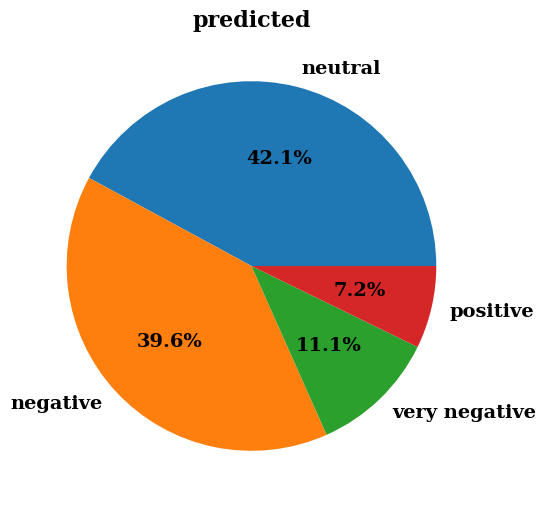

In [15]:
plt.figure(figsize=(15,6))
plt.pie(df['predicted'].value_counts(),labels=df['predicted'].value_counts().index, autopct='%1.1f%%', 
        textprops={'fontsize':14,'color':'black','weight':'bold','family':'serif'}
       )
hfont={'fontname':'serif','weight':'bold'}
plt.title('predicted',size=16,**hfont)
plt.show()

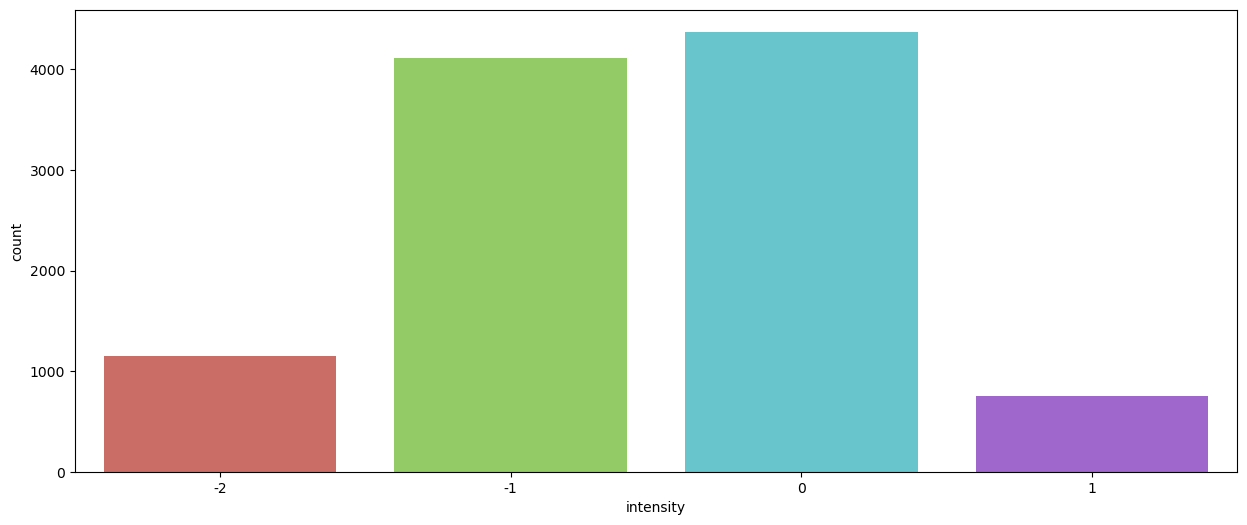

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['intensity'], data=df,palette='hls')
plt.show()

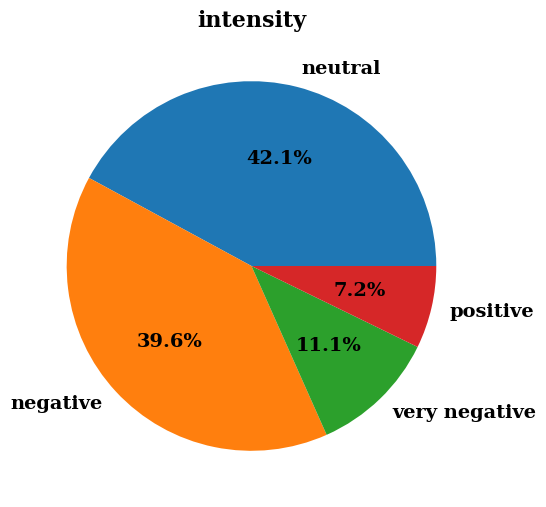

In [17]:
plt.figure(figsize=(15,6))
plt.pie(df['intensity'].value_counts(),labels=df['predicted'].value_counts().index, autopct='%1.1f%%', 
        textprops={'fontsize':14,'color':'black','weight':'bold','family':'serif'}
       )
hfont={'fontname':'serif','weight':'bold'}
plt.title('intensity',size=16,**hfont)
plt.show()

In [18]:
df.posts[0]

'I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by t

In [19]:
review_0 = df['posts'].values[0]
print(review_0)

print("***********"*5)

review_100 = df['posts'].values[100]
print(review_100)

print("***********"*5)

review_5500 = df['posts'].values[5500]
print(review_5500)

print("***********"*5)

review_10000 = df['posts'].values[10000]
print(review_10000)

I know as parent of child with down syndrome that you have all hear that our child are at a high risk of leukemia as parent we read up on it and then say well that will not happen to my child well when will have just turn 2yr old he start bruise the thought of leukemia breafly cross my mind but I quickly push it out of my mind and rationalize it by say that he was a rough playing 2yr old and it was normal to bruise now and then I have just go to work a few month before and will have get a little more fussy and whinny but that is normal to right well then he get sick and like a lot of child with down when he get sick he get sick so we take he to the doc on a friday they say he have a cold and I tell my boss that he was sick and not to be surpise if I call and say he was in the hospital because they offten have to do that when he get sick she say ok and when sit get there sure enough he was much sicker and we take he to the er they tell we he have rsv and send we home with some med by th

# Data Preprocessing

In [20]:
df_new = df.copy()

In [21]:
#Converting the text to lower case

def clean_text(text):
    text = text.lower()
    return text.strip() 
# the strip() function removes leading and trailing whitespaces 
# whereas the strip([characters]) eliminates leading and trailing characters passed to the strip() function.

In [22]:
df_new['posts'] = df_new['posts'].apply(lambda x : clean_text(x))
df_new['posts'].head()

0    i know as parent of child with down syndrome t...
1    but in my heart i know this is the future prom...
2    i have mylefibrosis which turn to leukemia the...
3    from one of my health group subject wayne dyer...
4    gmos now link to leukemia http nsnbc i 2013 07...
Name: posts, dtype: object

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
# Removing the punctuations

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [25]:
df_new['posts'] = df_new['posts'].apply(lambda x : remove_punctuation(x))
df_new['posts']

0        i know as parent of child with down syndrome t...
1        but in my heart i know this is the future prom...
2        i have mylefibrosis which turn to leukemia the...
3        from one of my health group subject wayne dyer...
4        gmos now link to leukemia http nsnbc i 2013 07...
                               ...                        
10387    hey everyone i am a 25 year old male i work ou...
10388    have surgery for stage 1 colon cancer 1 year a...
10389    the doctor advise we he could not remove the a...
10390    my 66 year old father have been through so muc...
10391    i have bein have a bloody stool since last yea...
Name: posts, Length: 10391, dtype: object

In [26]:
# Removing the stopwords
import nltk
from wordcloud import WordCloud

In [27]:
nltk.download('vader_lexicon') # feasibility to pick any language
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- If there are 5000 reviews then there are 5000 documents and 
- everything consolidated, entire documents considered is corpus and 
- vocabulary are the unique words and 
- word is how many words are in each review

In [28]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def remove_stopwords(text):
    output = " ".join(word for word in text.split() if word.lower() not in stopwords)
    return output

In [30]:
df_new['posts'] = df_new['posts'].apply(lambda x : remove_stopwords(x))
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [32]:
from nltk.stem import WordNetLemmatizer

- Stemmers remove morphological affixes from words, leaving only the word stem.
- Stemming is reducing the words or chopping the words into their root forms
- Lemmatizer : come,came,coming: come ; go,went,gone,going,goes:go
- In stemming meaningful word is not given everytime unlinke Lemmatizer wherein we get a meaningful word which is in dictionary
- Ex: care in stemming o/p: car and in Lemmatizer o/p: care
- history in stemming o/p: hist and in Lemmatizer o/p: histpry

In [33]:
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

In [35]:
df_new['posts'] = df_new['posts'].apply(lambda x : lemmatizer(x))
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc 2013 07 17 gmo l...
                               ...                        
10387    hey everyone 25 year old male work eat pretty ...
10388    surgery stage 1 colon cancer 1 year ago cea le...
10389    doctor advise could remove abnormal polyp chri...
10390    66 year old father much past year really need ...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [36]:
import re
# Removing numbers 
def remove_digits(text):
    clean_text = re.sub('[^a-z]+',' ',text) #r"\b[0-9]+bs*",""
    return clean_text

In [37]:
df_new['posts'] = df_new['posts'].apply(lambda x : remove_digits(x))
df_new['posts']

0        know parent child syndrome hear child high ris...
1        heart know future promise article regardless h...
2        mylefibrosis turn leukemia want stem cell tran...
3        one health group subject wayne dyer leukemia c...
4        gmos link leukemia http nsnbc gmo link leukemi...
                               ...                        
10387    hey everyone year old male work eat pretty hea...
10388    surgery stage colon cancer year ago cea level ...
10389    doctor advise could remove abnormal polyp chri...
10390     year old father much past year really need tr...
10391    bein bloody stool since last year start around...
Name: posts, Length: 10391, dtype: object

In [38]:
df_new

,posts,predicted,intensity
0,know parent child syndrome hear child high ris...,negative,-1
1,heart know future promise article regardless h...,neutral,0
2,mylefibrosis turn leukemia want stem cell tran...,negative,-1
3,one health group subject wayne dyer leukemia c...,neutral,0
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral,0
...,...,...,...
10387,hey everyone year old male work eat pretty hea...,negative,-1
10388,surgery stage colon cancer year ago cea level ...,very negative,-2
10389,doctor advise could remove abnormal polyp chri...,neutral,0
10390,year old father much past year really need tr...,neutral,0


In [39]:
df1 = df_new[['predicted','posts']]
df1.head()

,predicted,posts
0,negative,know parent child syndrome hear child high ris...
1,neutral,heart know future promise article regardless h...
2,negative,mylefibrosis turn leukemia want stem cell tran...
3,neutral,one health group subject wayne dyer leukemia c...
4,neutral,gmos link leukemia http nsnbc gmo link leukemi...


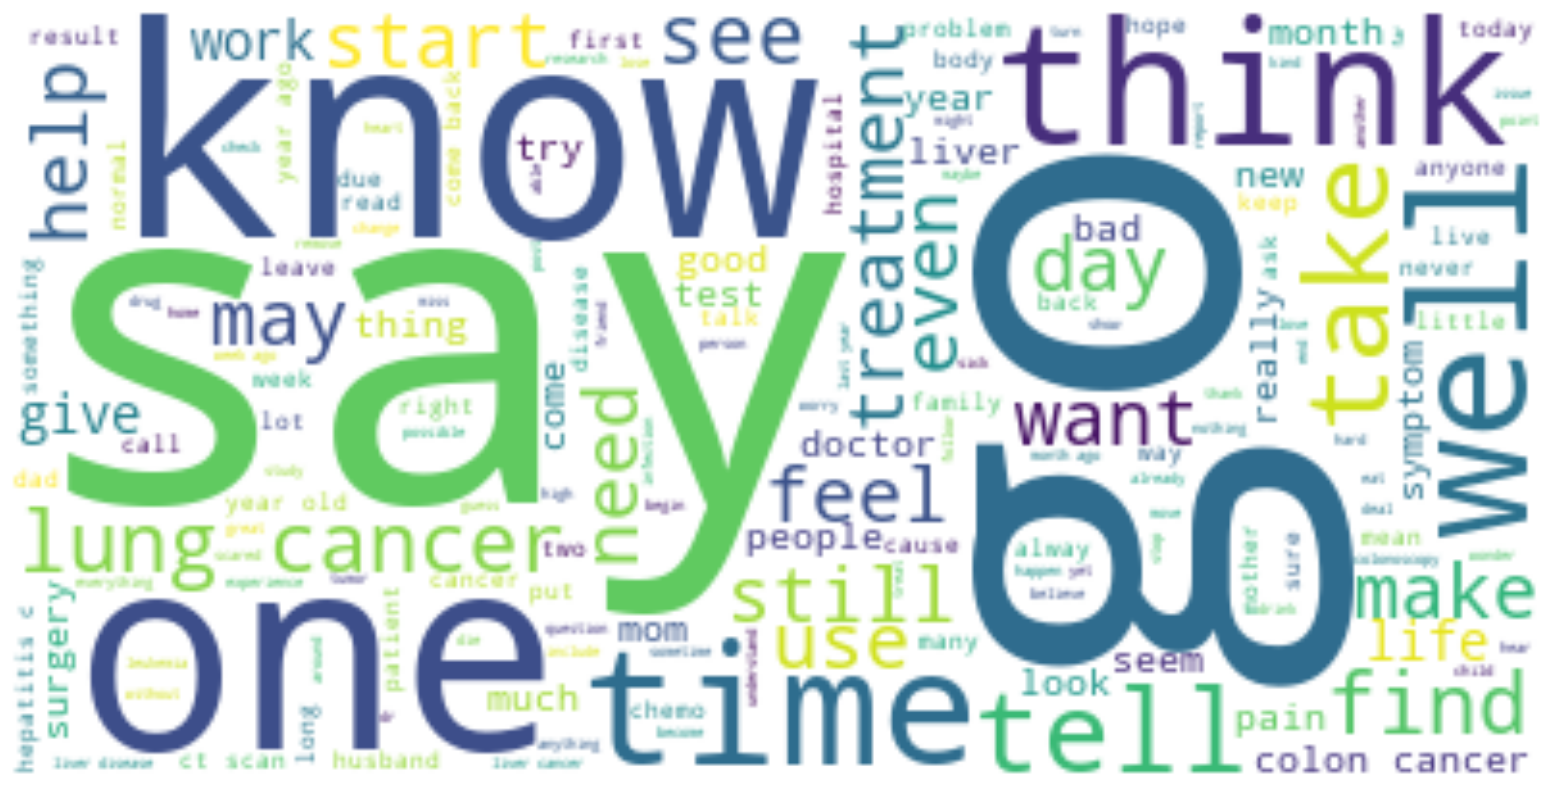

In [40]:
text_data = ' '.join(df1['posts'])
wordcloud = WordCloud(background_color = 'white').generate(text_data)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud,interpolation='bilinear')
ax.axis('off')
plt.show()

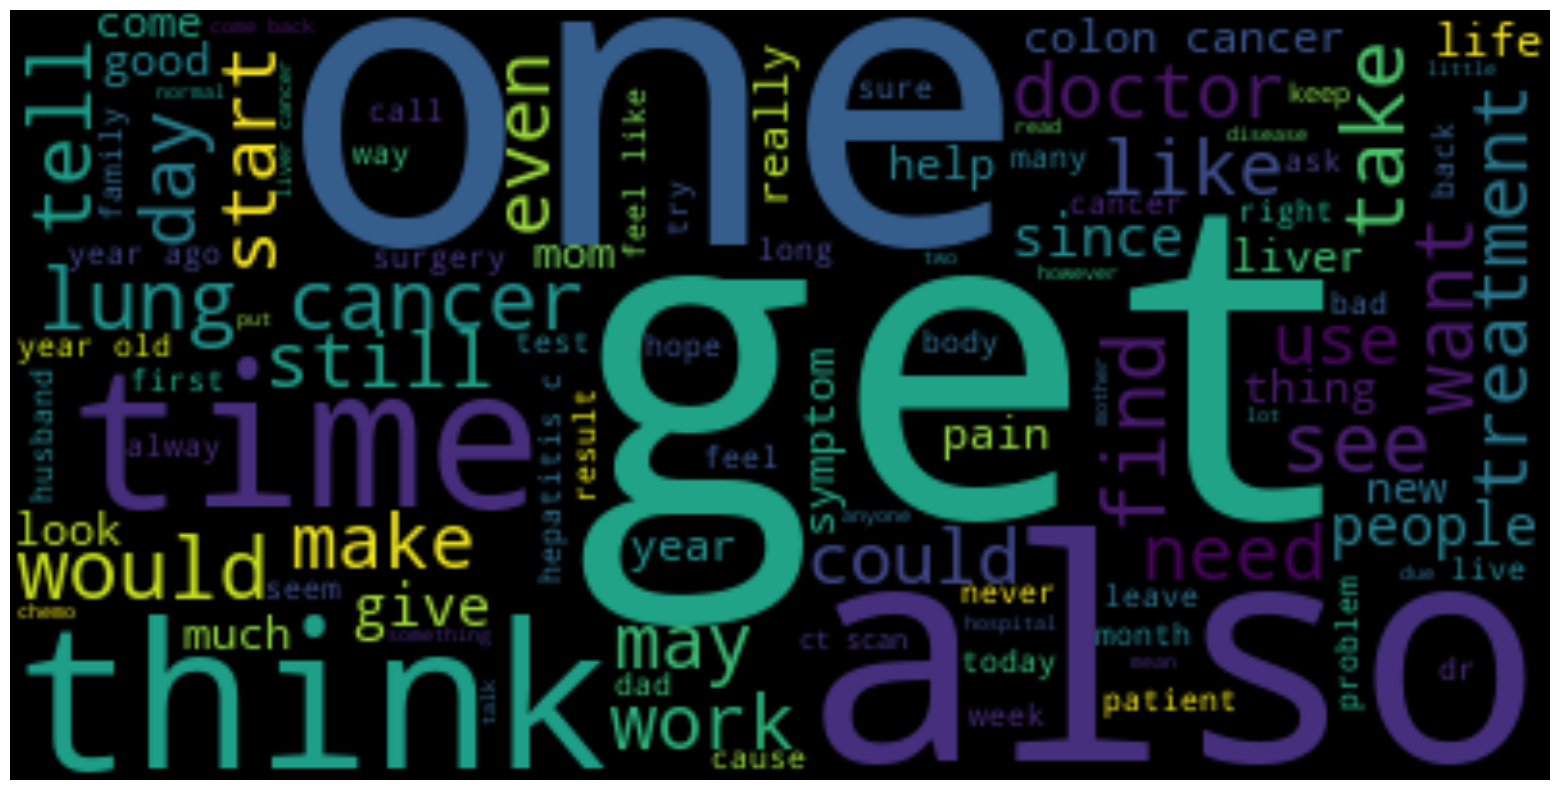

In [41]:
wcloud = WordCloud(max_words = 100,stopwords = ['go','say','know','well']).generate(text_data)
#got the first 100 top occuring words with the mentioned stopwords removed
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wcloud,interpolation='bilinear')
ax.axis('off')
plt.show()

In [39]:
# How to combine all the steps together
# feature engineering - BOW, TF-IDF, N-GRAMS, WORD2VEC, GLOVE
# MODEL Building - ML algorithm
# Model Building -Llama2 - GenAI

In [40]:
# Below steps to handle unstructuered data

In [42]:
df1.head()

,predicted,posts
0,negative,know parent child syndrome hear child high ris...
1,neutral,heart know future promise article regardless h...
2,negative,mylefibrosis turn leukemia want stem cell tran...
3,neutral,one health group subject wayne dyer leukemia c...
4,neutral,gmos link leukemia http nsnbc gmo link leukemi...


# Text Cleaning Approach

In [43]:
#pip install contractions

In [44]:
from tqdm import tqdm 
#combining,gives a heatmap whatever the dataset we have all the formulas have been applied on complete data scaling till 100% 
import contractions #I'm -> I am, You're -> You are,I've->I have,I don't->I donot,She doesn't-> Does not,isn't->Is not
from bs4 import BeautifulSoup
#when we extract data from social media links will have https:www, html, beautifulsoup will handle these formats
from nltk.stem import WordNetLemmatizer #converts to root word like run,ran,running -> run based on dictionary
import re # emoji, numbers, symbols to handle these
import nltk # para ->sentences->words->lower case, remove stopwords, handle punctuations
wordnet = WordNetLemmatizer()
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
len(df1)

10391

In [46]:
preprocessed_reviews = []
for sentence in tqdm(df1['posts'].values): #'posts' is the text data
    sentence = contractions.fix(sentence) #I'm -> I am, You're -> You are
    sentence = BeautifulSoup(sentence, 'lxml').get_text()#to make it fast use lxml,.get_text->all the html part will be removed
    sentence = re.sub(r"https\S+","", sentence) #removing https followed by any sentence
    sentence = re.sub("\S*\d\S*","",sentence).strip() # remove words having symbol, digit
    sentence = re.sub('[^a-zA-Z\s]', " ",sentence) #take sentences only with alphabets
    tokens = sentence.split() #splitting into list of words
    tokens = [wordnet.lemmatize(word) for word in tokens if word.lower() not in stopwords]
    cleaned_sentence = ' '.join(tokens).lower()
    preprocessed_reviews.append(cleaned_sentence.strip())
# on all the 10391 reviews the above formulas were applied

100%|███████████████████████████████████████████████████████████████████████████| 10391/10391 [00:28<00:00, 358.49it/s]


In [64]:
tokens

['bein',
 'bloody',
 'stool',
 'since',
 'last',
 'year',
 'start',
 'around',
 'june',
 'last',
 'week',
 'go',
 'away',
 'till',
 'end',
 'march',
 'year',
 'come',
 'back',
 'start',
 'bleed',
 'go',
 'doctor',
 'give',
 'diet',
 'stool',
 'could',
 'get',
 'bit',
 'soft',
 'see',
 'thing',
 'get',
 'well',
 'stool',
 'get',
 'thin',
 'soft',
 'diet',
 'give',
 'stop',
 'bleed',
 'bleeding',
 'come',
 'back',
 'week',
 'ago',
 'really',
 'big',
 'thick',
 'stool',
 'think',
 'damage',
 'something',
 'rectal',
 'rectum',
 'area',
 'think',
 'damage',
 'wound',
 'heal',
 'stool',
 'ussually',
 'mark',
 'line',
 'blood',
 'accompany',
 'couple',
 'drop',
 'blood',
 'nothing',
 'hurt',
 'though',
 'start',
 'get',
 'scared',
 'starting',
 'get',
 'depressed',
 'medical',
 'insurance',
 'anyways',
 'happen',
 'year',
 'ago',
 'go',
 'away',
 'day',
 'year',
 'old',
 'eat',
 'really',
 'healthy',
 'run',
 'mile',
 'every',
 'week',
 'know',
 'go',
 'local',
 'clinic',
 'month',
 'ago',
 '

In [65]:
preprocessed_reviews

['know parent child syndrome hear child high risk leukemia parent read say well happen child well turn yr old start bruise thought leukemia breafly cross mind quickly push mind rationalize say rough playing yr old normal bruise go work month get little fussy whinny normal right well get sick like lot child get sick get sick take doc friday say cold tell bos sick surpise call say hospital offten get sick say ok sit get sure enough much sicker take er tell rsv send home med time get home much bad take back time order test put hospital world start come around first say blood work come back bad want retest probley nothing come back say want move icu keep well start get scared thought come back leukemia put try push mind one want think bad well long doc come say believe william leukemia quickly fly beaumont tx houston tx texas childrens hospital really well remision still yr chemo run around walk anymore due one chemos vinchristin come back find way get around nothing go slow dow write say 

# Feature Engineering/ Extraction Method - convert Text to Vector

In [47]:
# TF-IDF-TERM FREQUENCY INVERSE DOCUMENT FREQUENCY
# Bag of Words- all unique words then give 1 if that word is present in each review
# In TF-IDF instead of 1 and 0 probability is given as values instead of giving same weight to all the words

# TF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [69]:
tf_idf_vect = TfidfVectorizer(max_features=1000) # using top 1000 most frequently occuring
tf_idf_vect.fit(preprocessed_reviews)
print('feature names :',tf_idf_vect.get_feature_names_out())
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews)
print("Count Vectorizer: ",type(final_counts_tfidf))

feature names : ['abdomen' 'abdominal' 'ability' 'able' 'abnormal' 'abuse' 'accord' 'ache'
 'acid' 'across' 'act' 'active' 'activity' 'actor' 'actually' 'acute'
 'add' 'addition' 'admit' 'adult' 'advance' 'advanced' 'advice' 'advise'
 'affect' 'afraid' 'age' 'aggressive' 'ago' 'agree' 'aid' 'alcohol'
 'alcoholic' 'allow' 'almost' 'alone' 'along' 'alot' 'already' 'also'
 'alt' 'alternative' 'although' 'always' 'amazing' 'american' 'aml'
 'among' 'amount' 'angry' 'animal' 'another' 'answer' 'anti' 'antibiotic'
 'anxiety' 'anymore' 'anyone' 'anything' 'anyway' 'appear' 'appetite'
 'appointment' 'appreciate' 'approve' 'appt' 'april' 'area' 'around'
 'arthritis' 'article' 'ask' 'associate' 'association' 'attack' 'august'
 'aunt' 'author' 'available' 'avoid' 'away' 'baby' 'back' 'bad' 'barely'
 'base' 'basically' 'bathroom' 'battle' 'bear' 'beat' 'become' 'bed'
 'begin' 'behind' 'believe' 'benefit' 'benign' 'big' 'bile' 'bill'
 'biopsy' 'birthday' 'bit' 'black' 'bladder' 'bleed' 'bleeding' '

Count Vectorizer:  <class 'scipy.sparse._csr.csr_matrix'>


In [71]:
final_counts_tfidf.shape # 1000 are the unique words as i have used in max_features

(10391, 1000)

In [72]:
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews).toarray()

In [73]:
final_counts_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.18329095],
       [0.        , 0.        , 0.        , ..., 0.03367615, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [74]:
pd.DataFrame(final_counts_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.183291
1,0.0,0.0,0.0,0.032195,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.017415,0.0,0.0,0.0,0.033676,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.053975,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.073761,0.0,0.0,0.035772,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [75]:
df1.head()

,predicted,posts
0,negative,know parent child syndrome hear child high ris...
1,neutral,heart know future promise article regardless h...
2,negative,mylefibrosis turn leukemia want stem cell tran...
3,neutral,one health group subject wayne dyer leukemia c...
4,neutral,gmos link leukemia http nsnbc gmo link leukemi...


In [58]:
y = df1['predicted'] # dependent 
x = final_counts_tfidf # independent

In [63]:
print(type(y))
print(type(x))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [59]:
y.value_counts()

predicted
neutral          4374
negative         4112
very negative    1155
positive          750
Name: count, dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_label = label.fit_transform(y)
y_label

array([0, 1, 0, ..., 1, 1, 0])

In [88]:
np.unique(y_label)

array([0, 1, 2, 3])

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_label, test_size = 0.2, random_state = 32, stratify = y)
#stratify for imbalanced data

## XGBoost

In [90]:
from xgboost import XGBClassifier

In [91]:
xgboost = XGBClassifier()
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [92]:
y_pred_train = xgboost.predict(x_train)
y_pred_test = xgboost.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score,classification_report

In [94]:
print("Training Accuracy :", accuracy_score(y_train,y_pred_train))
print("*"*100)
print("Test Accuracy :", accuracy_score(y_test,y_pred_test))

Training Accuracy : 0.9796679499518768
****************************************************************************************************
Test Accuracy : 0.7239057239057239


## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
fit_rf=RandomForestClassifier(random_state=10)

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_dist={'max_depth':[2,3,4,6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy'],
           'n_estimators':[5,10,15,20,25,30]}

cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [98]:
cv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [100]:
y_pred_test=cv_rf.predict(x_test)
y_pred_train=cv_rf.predict(x_train)

In [101]:
print("Training Accuracy :", accuracy_score(y_train,y_pred_train))
print("*"*100)
print("Test Accuracy :", accuracy_score(y_test,y_pred_test))

Training Accuracy : 0.7502406159769008
****************************************************************************************************
Test Accuracy : 0.6652236652236653


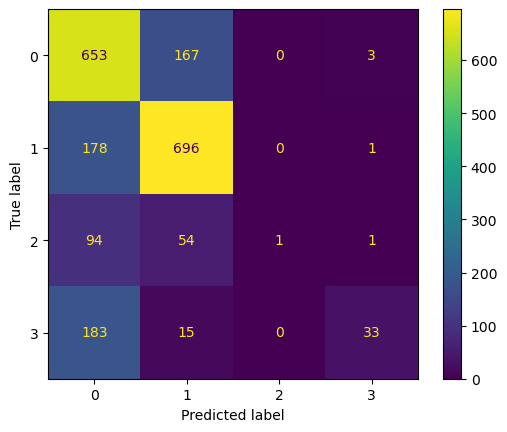

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#plot_confusion_matrix(cv_rf,X_test,y_test)
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()